Q1

     status_published  hour day_of_week
0 2018-04-22 06:00:00     6      Sunday
1 2018-04-21 22:45:00    22    Saturday
2 2018-04-21 06:17:00     6    Saturday
3 2018-04-21 02:29:00     2    Saturday
4 2018-04-18 03:22:00     3   Wednesday


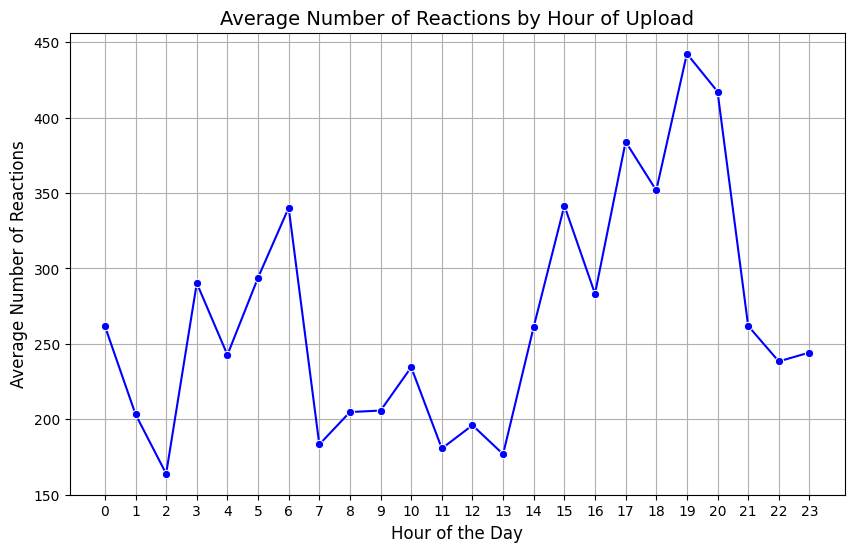

<ipython-input-2-167bffcce9e2>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_reactions.index, y=daily_reactions.values, palette='viridis')


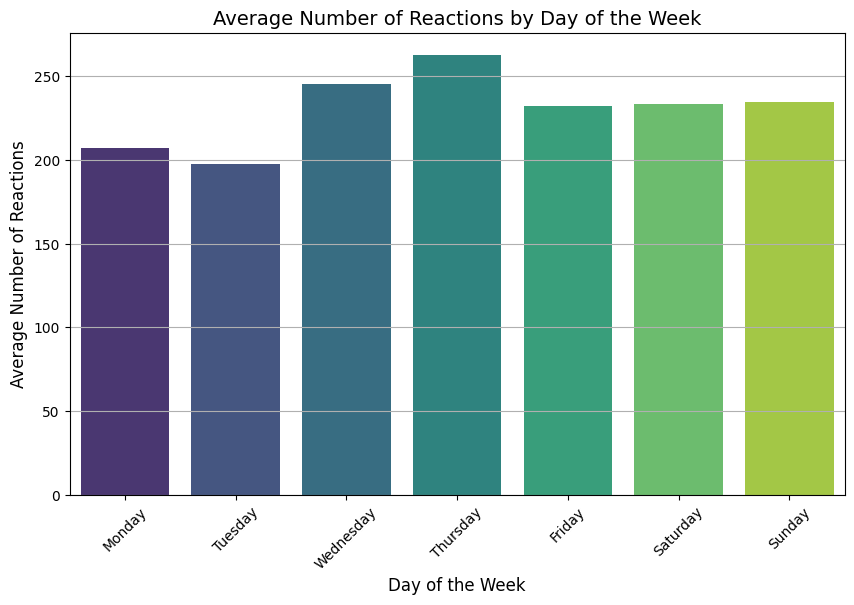

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
file_path = '/content/Facebook_Marketplace_data.csv'
data = pd.read_csv(file_path)

# Ensure `status_published` is in datetime format
data['status_published'] = pd.to_datetime(data['status_published'], errors='coerce')

# Extract hour and day of the week
data['hour'] = data['status_published'].dt.hour
data['day_of_week'] = data['status_published'].dt.day_name()

# Display a preview of the dataset
print(data[['status_published', 'hour', 'day_of_week']].head())


# Extract hour and day of the week from `status_published`
data['hour'] = data['status_published'].dt.hour
data['day_of_week'] = data['status_published'].dt.day_name()

# Calculate average reactions by hour
hourly_reactions = data.groupby('hour')['num_reactions'].mean()

# Plot the relationship between hour and number of reactions
plt.figure(figsize=(10, 6))
sns.lineplot(x=hourly_reactions.index, y=hourly_reactions.values, marker='o', color='b')
plt.title('Average Number of Reactions by Hour of Upload', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Number of Reactions', fontsize=12)
plt.grid()
plt.xticks(range(0, 24))
plt.show()

# Calculate average reactions by day of the week
daily_reactions = data.groupby('day_of_week')['num_reactions'].mean()

# Reorder days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_reactions = daily_reactions.reindex(day_order)

# Plot the relationship between day of the week and number of reactions
plt.figure(figsize=(10, 6))
sns.barplot(x=daily_reactions.index, y=daily_reactions.values, palette='viridis')
plt.title('Average Number of Reactions by Day of the Week', fontsize=14)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Number of Reactions', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Q2

               num_reactions  num_comments  num_shares
num_reactions       1.000000      0.150843    0.250723
num_comments        0.150843      1.000000    0.640637
num_shares          0.250723      0.640637    1.000000


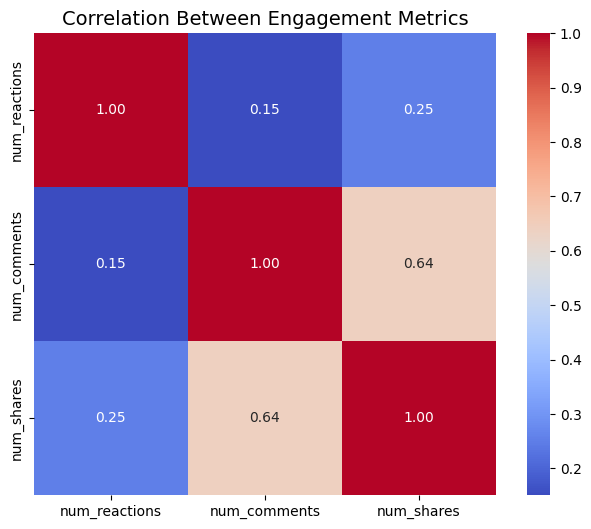

               num_reactions  num_comments  num_shares
num_reactions       1.000000      0.150843    0.250723
num_comments        0.150843      1.000000    0.640637
num_shares          0.250723      0.640637    1.000000


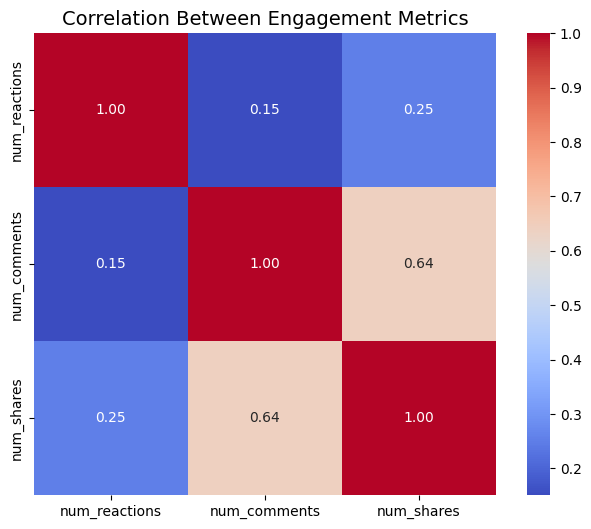

In [4]:
!pip install pandas seaborn matplotlib
import pandas as pd

# Load your dataset
file_path = '/content/Facebook_Marketplace_data.csv'
data = pd.read_csv(file_path)
# Extract relevant columns
engagement_data = data[['num_reactions', 'num_comments', 'num_shares']]
correlation_matrix = engagement_data.corr()
print(correlation_matrix)
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Between Engagement Metrics', fontsize=14)
plt.show()
# Load your dataset
file_path = '/content/Facebook_Marketplace_data.csv'
data = pd.read_csv(file_path)
# Extract relevant columns
engagement_data = data[['num_reactions', 'num_comments', 'num_shares']]
correlation_matrix = engagement_data.corr()
print(correlation_matrix)
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Between Engagement Metrics', fontsize=14)
plt.show()


Q3,4

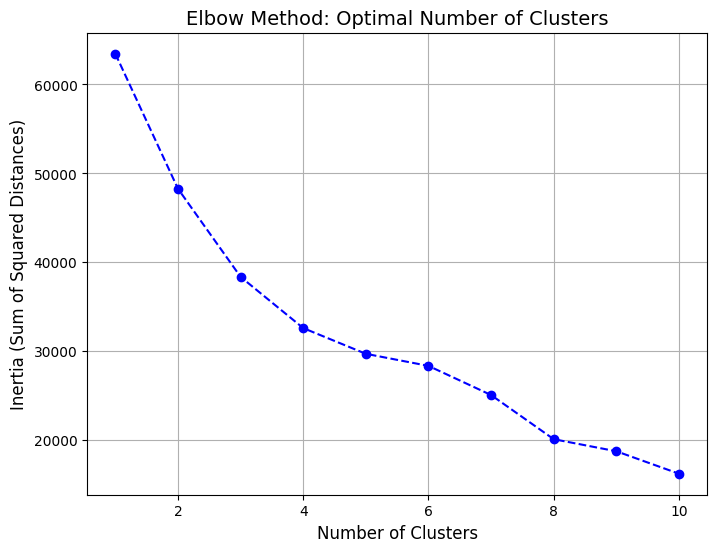

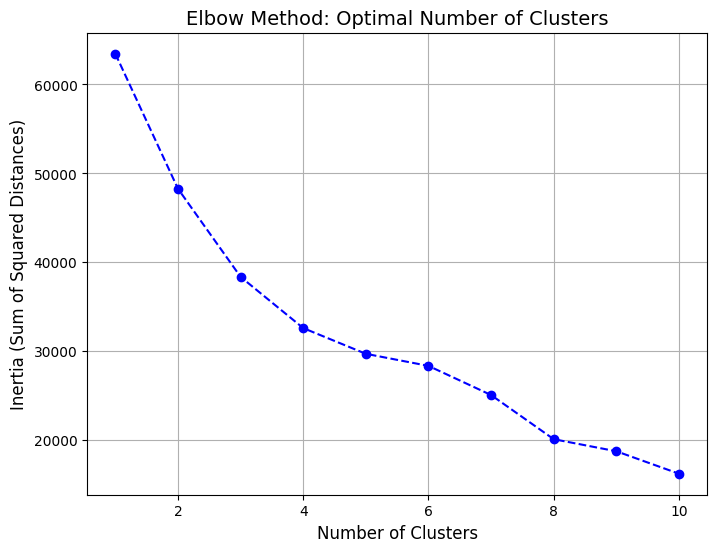

In [6]:
!pip install pandas numpy matplotlib scikit-learn
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load dataset
file_path = '/content/Facebook_Marketplace_data.csv'
data = pd.read_csv(file_path)

# Select relevant columns for clustering
columns = ['num_reactions', 'num_comments', 'num_shares', 'num_likes',
           'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
clustering_data = data[columns]

# Standardize the data for better performance of K-Means
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use the Elbow Method to find the optimal number of clusters
inertia = []
cluster_range = range(1, 11)  # Test clusters from 1 to 10

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--', color='b')
plt.title('Elbow Method: Optimal Number of Clusters', fontsize=14)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Inertia (Sum of Squared Distances)', fontsize=12)
plt.grid(True) #Corrected this line
plt.show()

# Load dataset
file_path = '/content/Facebook_Marketplace_data.csv'
data = pd.read_csv(file_path)

# Select relevant columns for clustering
columns = ['num_reactions', 'num_comments', 'num_shares', 'num_likes',
           'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
clustering_data = data[columns]

# Standardize the data for better performance of K-Means
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use the Elbow Method to find the optimal number of clusters
inertia = []
cluster_range = range(1, 11)  # Test clusters from 1 to 10

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia, marker='o', linestyle='--', color='b')
plt.title('Elbow Method: Optimal Number of Clusters', fontsize=14)
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Inertia (Sum of Squared Distances)', fontsize=12)
plt.grid()
plt.show()



In [7]:
# Replace `k_optimal` with the number of clusters chosen from the elbow method
k_optimal = 6  # Example value, replace with the actual optimal number
final_kmeans = KMeans(n_clusters=k_optimal, random_state=42)
data['Cluster'] = final_kmeans.fit_predict(clustering_data_scaled)

# Display a preview of the dataset with assigned clusters
print(data[['status_type', 'Cluster']].head())


  status_type  Cluster
0       video        0
1       photo        0
2       video        0
3       photo        0
4       photo        0


Q5

Count of different types of posts:
status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64


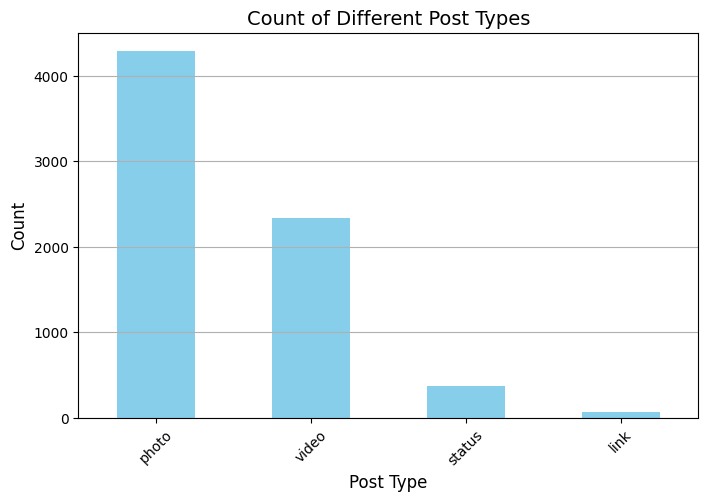

Count of different types of posts:
status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64


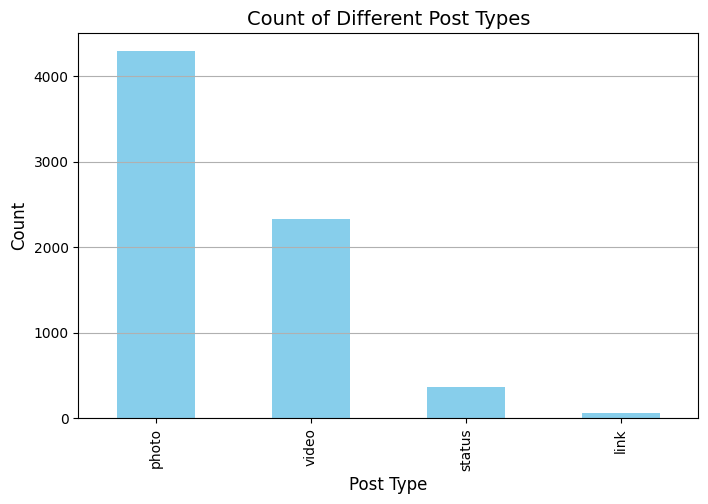

In [11]:
!pip install pandas
import pandas as pd

# Load the dataset
file_path = '/content/Facebook_Marketplace_data.csv'
data = pd.read_csv(file_path)
# Count the occurrences of each post type
post_type_counts = data['status_type'].value_counts()

# Print the counts
print("Count of different types of posts:")
print(post_type_counts)
import matplotlib.pyplot as plt

# Plot the counts
post_type_counts.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title('Count of Different Post Types', fontsize=14)
plt.xlabel('Post Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
# Load the dataset
file_path = '/content/Facebook_Marketplace_data.csv'
data = pd.read_csv(file_path)
# Count the occurrences of each post type
post_type_counts = data['status_type'].value_counts()

# Print the counts
print("Count of different types of posts:")
print(post_type_counts)
import matplotlib.pyplot as plt

# Plot the counts
post_type_counts.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title('Count of Different Post Types', fontsize=14)
plt.xlabel('Post Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()



Q6

Average values for each post type:
             num_reactions  num_comments  num_shares
status_type                                         
link            370.142857      5.698413    4.396825
photo           181.290345     15.993470    2.553871
status          438.783562     36.238356    2.558904
video           283.409597    642.478149  115.679949


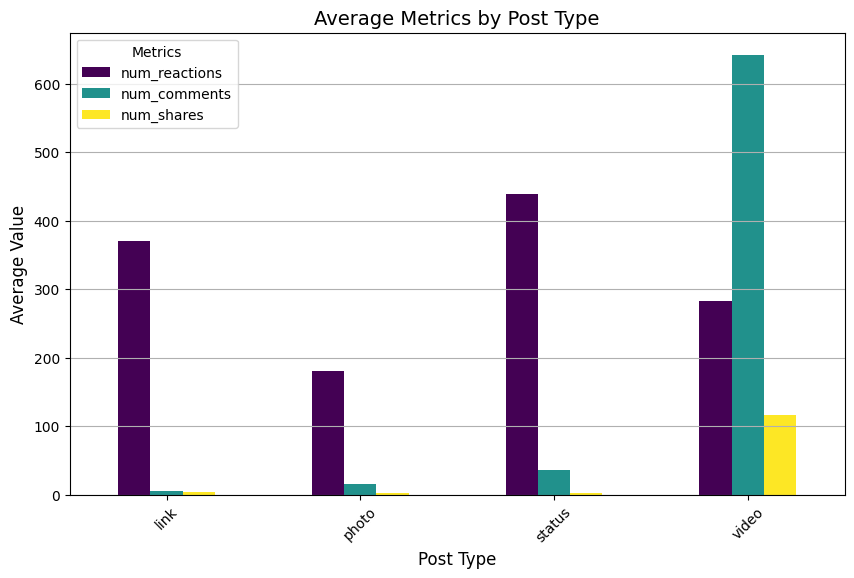

In [10]:
# Group by 'status_type' and calculate the average values
average_metrics = data.groupby('status_type')[['num_reactions', 'num_comments', 'num_shares']].mean()

# Display the result
print("Average values for each post type:")
print(average_metrics)
import matplotlib.pyplot as plt

# Plot average values for reactions, comments, and shares
average_metrics.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Average Metrics by Post Type', fontsize=14)
plt.xlabel('Post Type', fontsize=12)
plt.ylabel('Average Value', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Metrics', fontsize=10)
plt.show()
